# METODE DESICION TREE

**LINK COLLABS :https://colab.research.google.com/drive/1mYPc_jeoNYYbpiOpeOOJX2Zd-j5vn1KD#scrollTo=N6cRNaUJ_tGy**

Import Modul

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Mengimport dataset

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/okiokib/f2824f46e055c63b66d1a71c81459dd7/raw/33a9440e7d0d666d7ae3b6f6d0ede025d094482c/Crop_recommendation.csv')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Mengecek Label

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


Menormalisasi Label ke Bahasa Indonesia

In [ ]:
df['label'] = df['label'].map({'rice': 'Padi',
                               'maize': 'Jagung',
                               'jute': 'Rami',
                                'cotton': 'Kapas',
                                'coconut': 'Kelapa',
                                'papaya': 'Pepaya',
                                'orange': 'Jeruk',
                                'apple': 'Apel',
                                'muskmelon': 'Melon',
                                'watermelon': 'Semangka',
                                'grapes': 'Anggur',
                                'mango': 'Mangga',
                                'banana': 'Pisang',
                                'pomegranate': 'Buah Delima',
                                'lentil': 'Kacang Lentil',
                                'blackgram': 'Kacang Hitam',
                                'mungbean': 'Kacang Hijau',
                                'mothbeans': 'Kecipir',
                                'pigeonpeas': 'Kacang Kayu',
                                'kidneybeans': 'Kacang Merah',
                                'chickpea': 'Kacang Garbanzo',
                                'coffee': 'Kopi'
                               })
df.head(jumlah_baris)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Padi
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Kopi
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Kopi
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Kopi
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Kopi


Mengecek apakah ada data yang kosong

In [ ]:
df = df.copy()
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Mengecek Type Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Normalisasi Data

In [ ]:
data = df.copy()
selected_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
selected_data = data[selected_columns]

numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
numeric_data = selected_data[numeric_columns]

minmax = MinMaxScaler()
normalized_numeric = minmax.fit_transform(numeric_data)

label_encoder_result = LabelEncoder()
encoded_result = label_encoder_result.fit_transform(selected_data['label'])


Menyatukan data yang sudah dinormalisasi

In [ ]:
normalized_data = pd.DataFrame(
    {
        'N': normalized_numeric[:, 0],
        'P': normalized_numeric[:, 1],
        'K': normalized_numeric[:, 2],
        'temperature': normalized_numeric[:, 3],
        'humidity': normalized_numeric[:, 4],
        'ph': normalized_numeric[:, 5],
        'rainfall': normalized_numeric[:, 6],
        'label': encoded_result
    }
)


**Menampilkan Data Yang Sudah Dinormalisasi**

In [ ]:
normalized_data.head(jumlah_baris)


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,17
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,17
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,17
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,17
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,17
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,14
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,14
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,14
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,14


In [ ]:
# Memisahkan fitur dan target
X = normalized_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].copy()
y = normalized_data[['label']].copy()

In [ ]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

**DESICION TREE**

In [ ]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# membuat klasifikasi Decision Tree dengan kedalaman maksimum 3 dan kriteria pemisahan (splitting) Gini impurity.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# membuat model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.651295731707317, 0.9642857142857143, 'x[6] <= 0.037\ngini = 0.954\nsamples = 1760\nvalue = [86, 77, 77, 79, 86, 74, 81, 80, 77, 89, 80, 83\n76, 73, 83, 81, 83, 81, 77, 79, 77, 81]'),
 Text(0.6269054878048781, 0.8928571428571429, 'gini = 0.0\nsamples = 83\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 83, 0, 0, 0, 0, 0]'),
 Text(0.6756859756097561, 0.8928571428571429, 'x[2] <= 0.675\ngini = 0.952\nsamples = 1677\nvalue = [86, 77, 77, 79, 86, 74, 81, 80, 77, 89, 80, 83\n76, 73, 83, 81, 0, 81, 77, 79, 77, 81]'),
 Text(0.5038109756097561, 0.8214285714285714, 'x[4] <= 0.692\ngini = 0.947\nsamples = 1514\nvalue = [0, 0, 77, 79, 86, 74, 81, 80, 77, 89, 80, 83\n76, 73, 83, 81, 0, 81, 77, 79, 77, 81]'),
 Text(0.23323170731707318, 0.75, 'x[4] <= 0.157\ngini = 0.892\nsamples = 728\nvalue = [0, 0, 0, 77, 0, 74, 0, 80, 77, 89, 80, 0, 76\n0, 83, 81, 0, 0, 0, 0, 11, 0]'),
 Text(0.1402439024390244, 0.6785714285714286, 'x[2] <= 0.225\ngini = 0.499\nsamples = 154\nvalue = [0, 0, 0, 0,

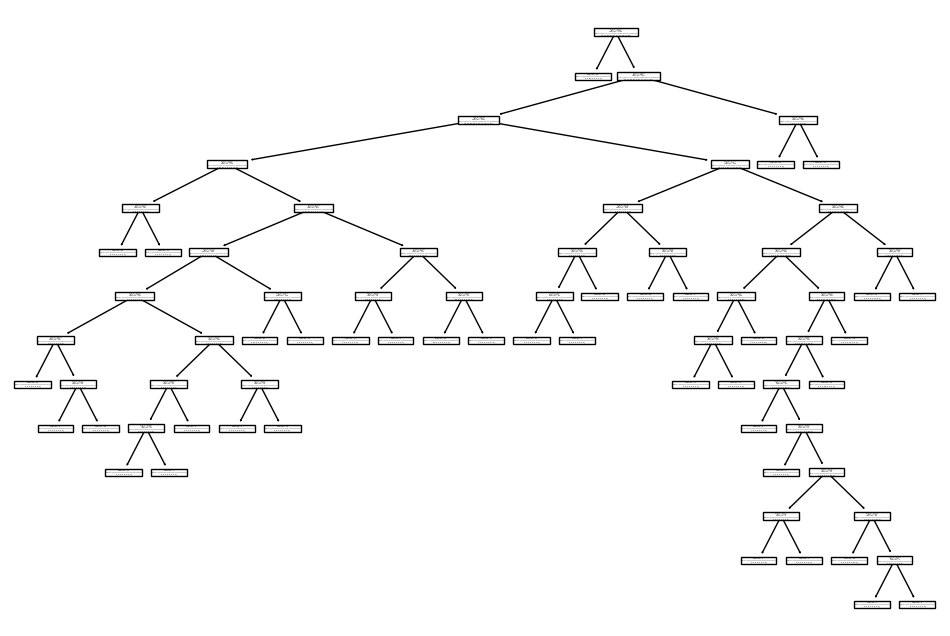

In [ ]:
# membuat figure dengan ukuran 12x8 inch (atau sekitar 30x20 cm).
plt.figure(figsize=(12,8))

# membuat visualisasi decision tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

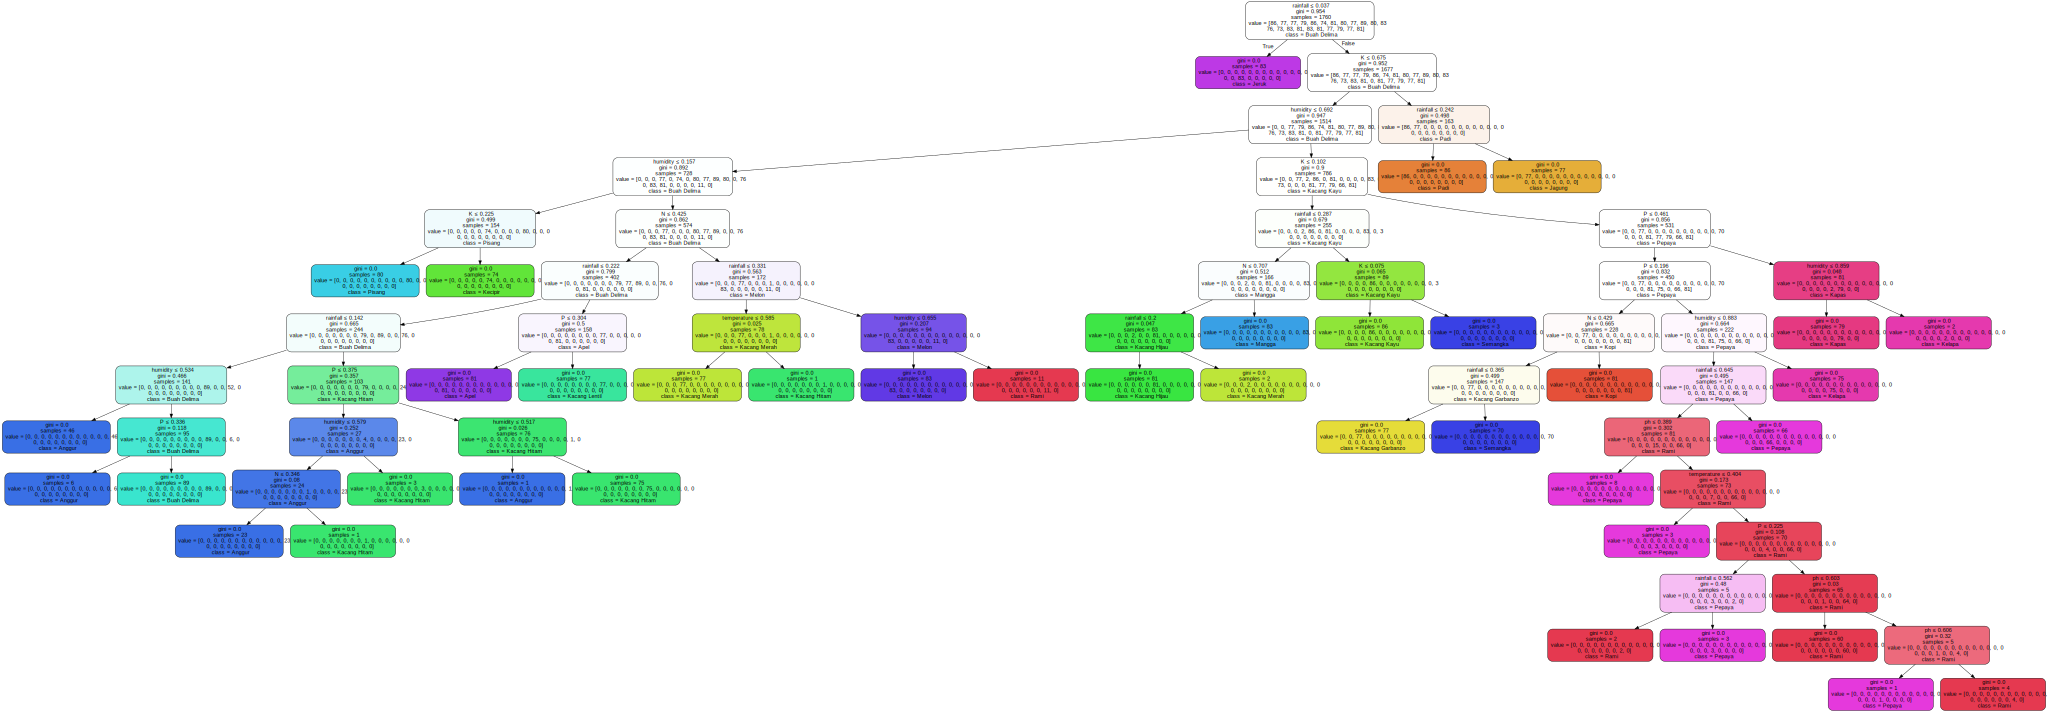

In [ ]:
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X.columns,
                              class_names=df['label'].unique(),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
# menghitung akurasi pada data testing
y_pred_gini = clf_gini.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_gini)
print('Accuracy Decision Tree: {:.2f}'.format(accuracy_dt))

Accuracy Decision Tree: 0.99
